Loading Data

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
try:
    data = pd.read_csv("/content/complete_dataset (2).csv", on_bad_lines='skip', low_memory=False)
    preview = data.head()
except Exception as e:
    preview = str(e)

preview


,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,terrorism,New York Times - News,0,http://www.nytimes.com/2016/09/20/nyregion/ahm...,"Bomb Suspect Changed After Trip Abroad, Friend...",2016-09-20,N. R. Kleinfield,"Besides his most recent trip to Quetta , Mr. R...","Besides his most recent trip to Quetta, Mr. Ra...",www.nytimes.com,left,004Gt3gcsotuiYmz
1,supreme_court,Vox,0,https://www.vox.com/policy-and-politics/2018/9...,Why Susan Collins claims she’s being bribed ov...,2018-09-12,"Emily Stewart, Terry Nguyen, Rebecca Jennings,...",Is Maine Republican Sen. Susan Collins being b...,Is Maine Republican Sen. Susan Collins being b...,www.vox.com,left,00eP4XD3VdMmHITE
2,education,Ezra Klein,0,http://www.npr.org/blogs/thetwo-way/2014/05/06...,Poll: Prestigious Colleges Won't Make You Happ...,2014-05-06,Anya Kamenetz,Poll : Prestigious Colleges Wo n't Make You Ha...,Poll: Prestigious Colleges Won't Make You Happ...,www.npr.org,left,00FTGIZEd6B8zQ4U
3,us_house,Breitbart News,2,http://www.breitbart.com/big-government/2017/0...,Paul Ryan Reportedly Says No Chance for Border...,2017-09-12,Ian Mason,"House Speaker Paul Ryan , at a private dinner ...","House Speaker Paul Ryan, at a private dinner e...",www.breitbart.com,right,00HGGqBRf1kzPRlg
4,white_house,Guest Writer - Left,0,https://www.cnn.com/2019/07/11/politics/donald...,OPINION: Trump seeking change of legal fortune...,2019-07-11,Analysis Stephen Collinson,( CNN ) President Donald Trump has reason to h...,(CNN) President Donald Trump has reason to hop...,www.cnn.com,left,00IzI5ynahBVtC9l


In [ ]:
data.head()

,topic,source,bias,url,title,date,authors,content,content_original,source_url,bias_text,ID
0,terrorism,New York Times - News,0,http://www.nytimes.com/2016/09/20/nyregion/ahm...,"Bomb Suspect Changed After Trip Abroad, Friend...",2016-09-20,N. R. Kleinfield,"Besides his most recent trip to Quetta , Mr. R...","Besides his most recent trip to Quetta, Mr. Ra...",www.nytimes.com,left,004Gt3gcsotuiYmz
1,supreme_court,Vox,0,https://www.vox.com/policy-and-politics/2018/9...,Why Susan Collins claims she’s being bribed ov...,2018-09-12,"Emily Stewart, Terry Nguyen, Rebecca Jennings,...",Is Maine Republican Sen. Susan Collins being b...,Is Maine Republican Sen. Susan Collins being b...,www.vox.com,left,00eP4XD3VdMmHITE
2,education,Ezra Klein,0,http://www.npr.org/blogs/thetwo-way/2014/05/06...,Poll: Prestigious Colleges Won't Make You Happ...,2014-05-06,Anya Kamenetz,Poll : Prestigious Colleges Wo n't Make You Ha...,Poll: Prestigious Colleges Won't Make You Happ...,www.npr.org,left,00FTGIZEd6B8zQ4U
3,us_house,Breitbart News,2,http://www.breitbart.com/big-government/2017/0...,Paul Ryan Reportedly Says No Chance for Border...,2017-09-12,Ian Mason,"House Speaker Paul Ryan , at a private dinner ...","House Speaker Paul Ryan, at a private dinner e...",www.breitbart.com,right,00HGGqBRf1kzPRlg
4,white_house,Guest Writer - Left,0,https://www.cnn.com/2019/07/11/politics/donald...,OPINION: Trump seeking change of legal fortune...,2019-07-11,Analysis Stephen Collinson,( CNN ) President Donald Trump has reason to h...,(CNN) President Donald Trump has reason to hop...,www.cnn.com,left,00IzI5ynahBVtC9l


In [ ]:
# Print column names
data.columns

Index(['topic', 'source', 'bias', 'url', 'title', 'date', 'authors', 'content',
       'content_original', 'source_url', 'bias_text', 'ID'],
      dtype='object')

In [ ]:
# Extract only bias and original content for modeling
df = data[['bias', 'content_original']]

df.columns

Index(['bias', 'content_original'], dtype='object')

In [ ]:
# Check null count
df.isnull().sum()

bias                0
content_original    0
dtype: int64

Data Preparation

In [ ]:
# Text lowercase function
def lower_text(text):
    text = text.lower()
    return text

# Apply lower_text
df['content_original'] = data['content_original'].apply(lower_text)

df.head()

<ipython-input-7-0d41b1acac41>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_original'] = data['content_original'].apply(lower_text)


,bias,content_original
0,0,"besides his most recent trip to quetta, mr. ra..."
1,0,is maine republican sen. susan collins being b...
2,0,poll: prestigious colleges won't make you happ...
3,2,"house speaker paul ryan, at a private dinner e..."
4,0,(cnn) president donald trump has reason to hop...


In [ ]:
# Remove special characters function
def special_char(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

# Apply special_char
df['content_original'] = df['content_original'].apply(special_char)

df.head()

<ipython-input-8-8d0d914f2b41>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_original'] = df['content_original'].apply(special_char)


,bias,content_original
0,0,besides his most recent trip to quetta mr raha...
1,0,is maine republican sen susan collins being br...
2,0,poll prestigious colleges wont make you happie...
3,2,house speaker paul ryan at a private dinner ea...
4,0,cnn president donald trump has reason to hope ...


In [ ]:
# Define a function to check if special characters are present in a string
def has_special_characters(column):
    pattern = r'[^a-zA-Z0-9\s]'
    for text in column:
        if re.search(pattern, text):
            return True
    return False

# Apply the function
has_special_characters(df['content_original'])

False

In [ ]:
# Create word count function
def get_word_count(tokens):
    return len(tokens)

# Apply function to  get word count for top 5 rows
df['content_original'].head().apply(get_word_count)

0    2474
1    7617
2    4110
3    4946
4    9229
Name: content_original, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenization
df['tokens'] = df['content_original'].apply(word_tokenize)

df.head()

<ipython-input-12-c8ec6a9f1034>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['content_original'].apply(word_tokenize)


,bias,content_original,tokens
0,0,besides his most recent trip to quetta mr raha...,"[besides, his, most, recent, trip, to, quetta,..."
1,0,is maine republican sen susan collins being br...,"[is, maine, republican, sen, susan, collins, b..."
2,0,poll prestigious colleges wont make you happie...,"[poll, prestigious, colleges, wont, make, you,..."
3,2,house speaker paul ryan at a private dinner ea...,"[house, speaker, paul, ryan, at, a, private, d..."
4,0,cnn president donald trump has reason to hope ...,"[cnn, president, donald, trump, has, reason, t..."


In [ ]:

# Apply function
df['tokens'].head().apply(get_word_count)

0     432
1    1238
2     702
3     854
4    1523
Name: tokens, dtype: int64

In [ ]:
stop_words = set(['is', 'a', 'with'])

In [ ]:
# Function to remove stop words from text
def remove_stop_words(tokens):
    # Remove stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Apply the function to the 'content_original' column
df['tokens'] = df['tokens'].apply(remove_stop_words)

<ipython-input-15-57acffffb3e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(remove_stop_words)


In [ ]:
# Check word count
df['tokens'].head().apply(get_word_count)

0     406
1    1188
2     669
3     818
4    1459
Name: tokens, dtype: int64

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Perform lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

<ipython-input-18-4e04ca8898ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [ ]:
# Check word count
df['tokens'].head().apply(get_word_count)

0     406
1    1188
2     669
3     818
4    1459
Name: tokens, dtype: int64

In [ ]:
df.head()

,bias,content_original,tokens
0,0,besides his most recent trip to quetta mr raha...,"[besides, his, most, recent, trip, to, quetta,..."
1,0,is maine republican sen susan collins being br...,"[maine, republican, sen, susan, collins, being..."
2,0,poll prestigious colleges wont make you happie...,"[poll, prestigious, college, wont, make, you, ..."
3,2,house speaker paul ryan at a private dinner ea...,"[house, speaker, paul, ryan, at, private, dinn..."
4,0,cnn president donald trump has reason to hope ...,"[cnn, president, donald, trump, ha, reason, to..."


LSTM

In [ ]:
pip install tensorflow


In [ ]:
import csv
import pandas as pd

try:
    # Reading the CSV file using Python's built-in csv module
    with open('/content/complete_dataset (2).csv', 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        # Convert CSV reader object to a list of rows
        rows = list(reader)

    # Convert list of rows to DataFrame
    data = pd.DataFrame(rows[1:], columns=rows[0])  # Assuming the first row is the header
    preview = data.head()
except Exception as e:
    preview = str(e)

print(preview)



           topic                 source bias  \
0      terrorism  New York Times - News    0   
1  supreme_court                    Vox    0   
2      education             Ezra Klein    0   
3       us_house         Breitbart News    2   
4    white_house    Guest Writer - Left    0   

                                                 url  \
0  http://www.nytimes.com/2016/09/20/nyregion/ahm...   
1  https://www.vox.com/policy-and-politics/2018/9...   
2  http://www.npr.org/blogs/thetwo-way/2014/05/06...   
3  http://www.breitbart.com/big-government/2017/0...   
4  https://www.cnn.com/2019/07/11/politics/donald...   

                                               title        date  \
0  Bomb Suspect Changed After Trip Abroad, Friend...  2016-09-20   
1  Why Susan Collins claims she’s being bribed ov...  2018-09-12   
2  Poll: Prestigious Colleges Won't Make You Happ...  2014-05-06   
3  Paul Ryan Reportedly Says No Chance for Border...  2017-09-12   
4  OPINION: Trump seeking change o

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-04-23 01:05:08--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-04-23 01:05:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-23 01:05:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

def load_glove_embeddings(path):
    embeddings_index = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embeddings_index = load_glove_embeddings('glove.6B.100d.txt')
print(f'Loaded {len(embeddings_index)} word vectors.')


Loaded 400000 word vectors.


In [ ]:
embedding_dim = 100  # This should match the dimensions of the GloVe embeddings you loaded

# Assuming you have `max_words` and `tokenizer` already defined
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # words not found in embedding index will be all-zeros.


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               84480     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1084867 (4.14 MB)
Trainable params: 84867 (331.51 KB)
Non-trainable params: 1000000 (3.81 MB)
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, LearningRateScheduler

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define Learning Rate Scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.9

lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/10
376/376 [==============================] - 216s 532ms/step - loss: 0.9684 - accuracy: 0.4909 - val_loss: 0.9192 - val_accuracy: 0.5284 - lr: 0.0010
Epoch 2/10
376/376 [==============================] - 197s 523ms/step - loss: 0.8970 - accuracy: 0.5474 - val_loss: 0.8618 - val_accuracy: 0.5723 - lr: 0.0010
Epoch 3/10
376/376 [==============================] - 197s 523ms/step - loss: 0.8518 - accuracy: 0.5761 - val_loss: 0.8213 - val_accuracy: 0.5941 - lr: 0.0010
Epoch 4/10
376/376 [==============================] - 194s 516ms/step - loss: 0.8108 - accuracy: 0.6046 - val_loss: 0.8113 - val_accuracy: 0.6003 - lr: 0.0010
Epoch 5/10
376/376 [==============================] - 197s 523ms/step - loss: 0.7867 - accuracy: 0.6207 - val_loss: 0.7864 - val_accuracy: 0.6186 - lr: 0.0010
Epoch 6/10
376/376 [==============================] - 200s 533ms/step - loss: 0.7623 - accuracy: 0.6374 - val_loss: 0.7684 - val_accuracy: 0.6316 - lr: 9.0000e-04
Epoch 7/10
376/376 [======================

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

235/235 [==============================] - 13s 57ms/step - loss: 0.7370 - accuracy: 0.6490
Test Accuracy: 0.6490480899810791


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Text preprocessing
max_words = 10000  # We'll keep the 10,000 most frequent words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['content_original'])
sequences = tokenizer.texts_to_sequences(data['content_original'])
max_len = 100  # This is the length that each sequence will be padded to
X = pad_sequences(sequences, maxlen=max_len)

# Convert labels to categorical
Y = to_categorical(data['bias'], num_classes=3)

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),  # Embedding layer
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1329603 (5.07 MB)
Trainable params: 1329603 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.layers import Bidirectional

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from keras.optimizers import Adam

# Define the maximum number of words and the maximum sequence length
max_words = 10000  # example max number of words in the vocabulary
max_len = 100      # example max length of input sequences

# Step 1: Define the Model Architecture
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),  # Embedding layer
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),  # LSTM layer
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Step 2: Compile the Model
model.compile(
    loss='categorical_crossentropy',  # Loss function to use
    optimizer=Adam(learning_rate=0.001),  # Optimizer
    metrics=['accuracy']  # Metrics to track
)

# Print the model summary to check your model's architecture
model.summary()

# Setup early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=3,            # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)
from keras.callbacks import LearningRateScheduler

# Define a scheduler function
def scheduler(epoch, lr):
    if epoch < 5:
        return lr  # No change in the first 5 epochs
    else:
        return lr * 0.9  # Reduce the learning rate by multiplying it by 0.9

# Setup learning rate scheduler
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler]  # List of callbacks
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1379203 (5.26 MB)
Trainable params: 1379203 (5.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
376/376 [==============================] - 267s 662ms/step - loss: 0.8558 - accuracy: 0.5825 - val_loss: 0.7596 - val_accur

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

235/235 [==============================] - 23s 99ms/step - loss: 0.7482 - accuracy: 0.6628
Test Accuracy: 0.6627612709999084


In [ ]:
def plot_learning(history):
    tgts = ['loss', 'accuracy']
    vtgts = ['val_loss', 'val_accuracy']
    labels = ['Training', 'Validation']

    plt.figure(figsize=(12, 5))

    for i, (tgt, val_tgt) in enumerate(zip(tgts, vtgts)):
        plt.subplot(1, 2, i+1)
        plt.plot(history.history[tgt], label=f'{labels[0]} {tgt.capitalize()}', color='blue', linestyle='-')
        plt.plot(history.history[val_tgt], label=f'{labels[1]} {tgt.capitalize()}', color='orange', linestyle='--')
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel(tgt.capitalize(), fontsize=12)
        plt.legend(fontsize=10)
        plt.title(f"{tgt.capitalize()} Comparison", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

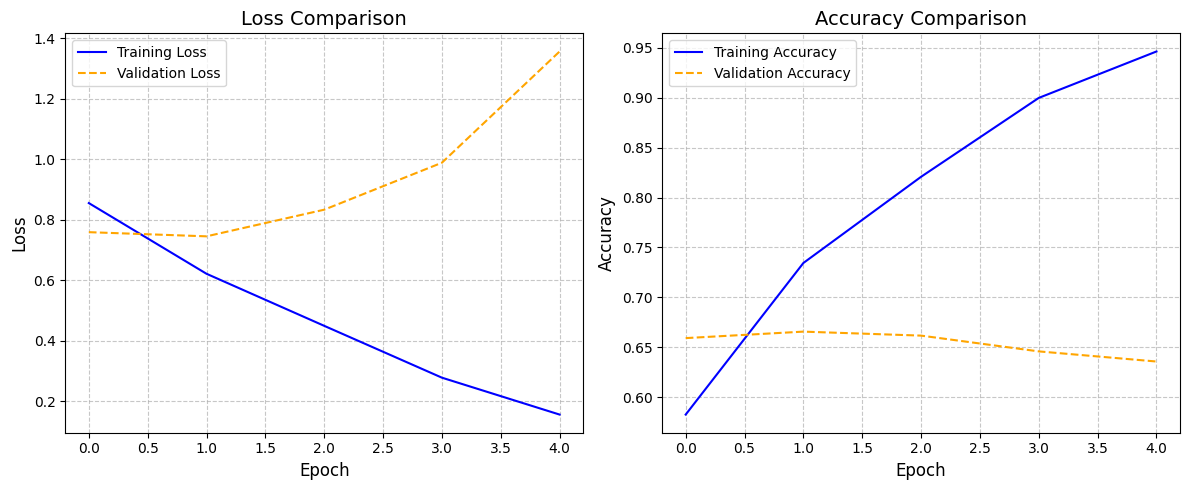

In [ ]:
plot_learning(history)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10
376/376 [==============================] - 128s 322ms/step - loss: 0.8634 - accuracy: 0.5717 - val_loss: 0.7800 - val_accuracy: 0.6337
Epoch 2/10
376/376 [==============================] - 125s 332ms/step - loss: 0.6891 - accuracy: 0.6998 - val_loss: 0.7878 - val_accuracy: 0.6261
Epoch 3/10
376/376 [==============================] - 126s 336ms/step - loss: 0.5652 - accuracy: 0.7676 - val_loss: 0.7866 - val_accuracy: 0.6505
Epoch 4/10
376/376 [==============================] - 117s 310ms/step - loss: 0.4429 - accuracy: 0.8251 - val_loss: 0.8816 - val_accuracy: 0.6429
Epoch 5/10
376/376 [==============================] - 126s 334ms/step - loss: 0.3429 - accuracy: 0.8695 - val_loss: 1.0061 - val_accuracy: 0.6422
Epoch 6/10
376/376 [==============================] - 127s 339ms/step - loss: 0.2662 - accuracy: 0.9011 - val_loss: 1.1823 - val_accuracy: 0.6311
Epoch 7/10
376/376 [==============================] - 119s 317ms/step - loss: 0.2072 - accuracy: 0.9266 - val_loss: 1.3287 -

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)


235/235 [==============================] - 11s 45ms/step - loss: 1.8573 - accuracy: 0.6064
Test Accuracy: 0.6064438819885254


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf  # Ensure TensorFlow is imported
from transformers import BertTokenizerFast

from transformers import BertTokenizer
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
batch_size = 1000  # Define a suitable batch size based on your dataset and memory constraints

def batch_tokenize(texts):
    input_ids = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, max_length=512, truncation=True, padding="max_length", return_tensors="tf")
        input_ids.append(inputs['input_ids'])
    return np.concatenate(input_ids, axis=0)

inputs = batch_tokenize(data['content_original'].to_list())


# Convert labels to appropriate format if needed
labels = tf.keras.utils.to_categorical(data['bias'], num_classes=3)  # Ensure labels are in one-hot encoded format

# Load pre-trained model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Compile the model using TensorFlow's Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

# Train the model
model.fit(inputs['input_ids'], labels, epochs=3, batch_size=8)


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

# Convert data to a TensorFlow Dataset object
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(buffer_size=1024).batch(128)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(128)

# Use prefetch to improve latency and throughput
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Set up mixed precision
mixed_precision.set_global_policy('mixed_float16')

max_words = 5000  # Assuming this is the max vocab size you want
max_len = 150     # Max sequence length

# Adjust tokenizer and model setup
tokenizer = Tokenizer(num_words=max_words + 1)
tokenizer.fit_on_texts(data['content_original'])
sequences = tokenizer.texts_to_sequences(data['content_original'])
X = pad_sequences(sequences, maxlen=max_len)

Y = to_categorical(data['bias'], num_classes=3)

# Assuming X_train, Y_train are defined
model = Sequential([
    Embedding(max_words + 1, 64, input_length=max_len, dtype='float16'),  # Include 0 index for padding
    GRU(32, dropout=0.1, recurrent_dropout=0.1, dtype='float16'),
    Dense(3, activation='softmax', dtype='float32')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

# Define a learning rate scheduler
def scheduler(epoch, lr):
    return lr * 0.9 if epoch > 5 else lr

callback_lr = LearningRateScheduler(scheduler)

# Training the model
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2, callbacks=[callback_lr])


In [ ]:
#test2
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),  # Stacked LSTM
    LSTM(32),  # Additional LSTM layer
    Dense(3, activation='softmax')
])


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

# Training with a larger batch size
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
#test1
# Evaluate the model on the test data using `evaluate`
loss, accuracy = model1.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4%}')


In [ ]:
#test2
# Evaluate the model on the test data using `evaluate`
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4%}')


In [ ]:
new_texts = ["This model is fantastic and provides a great representation of the data"]  # Example new text
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_len)

predictions = model.predict(new_X)
predicted_class = predictions.argmax(axis=1)
print("Predicted class:", predicted_class)
new_texts = ["Sample text to predict bias."]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_len)

predictions = model.predict(new_X)
predicted_class = predictions.argmax(axis=1)
print("Predicted class:", predicted_class)
